# Predicting ship collisions in the arctic sea

In [175]:
#Import Libraries
#Using: file:///C:/Users/shayl/Downloads/2018_Marine%20transportation%20risk%20assessment%20using%20Bayesian%20Network%20(1).pdf
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.image as gumimage
import itertools

**Regarding the function below**<br>
The getIterations function takes in an array of items that would be the inputs to the "or" gate in the Fault Tree, The variable that would be the output to the fault tree and then the decision network itself

In [176]:
#Helper methods
def count(items):
    num = 0
    for i in items:
        if i == 1:
            num = num+1
    if num<len(items)/2: #Check if should be < or <=
        return True
    else:
        return False
    
def even(num):
    if num%2==0:
        return True
    else:
        return False

def getIterations(vars, mainVariable, dn):
    lst = list(itertools.product([0, 1], repeat=len(vars)))
    items = {}
    checker = 0
    for i in lst:
        for j in range(len(vars)):
            items[vars[j]] = i[j]
        #print("Method insert for", mainVariable, "dictionary is", items, "with probabilities", "[1-0.00004396, 0.00004396]")
        #dn.cpt(mainVariable)[items] = [1-0.00004396, 0.00004396]
        
        #Swap every second value
        if even(checker):
            dn.cpt(mainVariable)[items] = [1-0.00004396, 0.00004396]
            checker = checker+1
        else:
            dn.cpt(mainVariable)[items] = [0.00004396, 1-0.00004396]
            checker = checker+1


# Construction

## Define Nodes

In [177]:
#Define Nodes
dn = gum.InfluenceDiagram()
#Regular Nodes
var_names = ["Waves", "HighWind", "Fog", "PackIce", "RidgeIceAndIceberg", "Collision", "Environment", "HighSpeed", "EquipmentError", "RadarFailure", "HumanError", "ShipFault", "Navigation"]
waves, highwind, fog, packice, ridgeiceandiceberg, collision, environment, highspeed, equipmenterror, radarfailure, humanerror, shipfault, navigation = [dn.add(gum.LabelizedVariable(name, name, 2)) for name in var_names]
#The above are binary variables, region isn't so do that manually:
region = dn.add(gum.LabelizedVariable("Region", "Region", ["region1", "region2", "region3", "region4", "region5"]))
#Decision Node
changecourse = dn.addDecisionNode(gum.LabelizedVariable("ChangeCourse", "ChangeCourse", 2))
#Utility Node
u = dn.addUtilityNode(gum.LabelizedVariable("U", "U", 1))
gnb.showBN(dn,size="15")

## Arcs

Add in Arcs

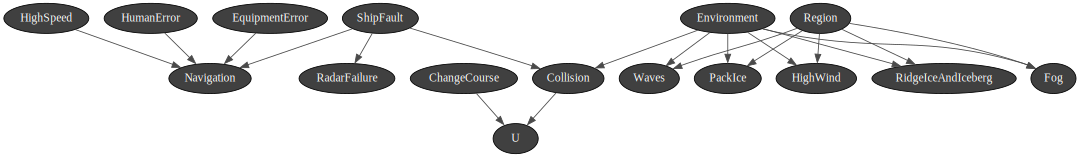

In [178]:
dn.addArc(region, waves)
dn.addArc(region, highwind)
dn.addArc(region, fog)
dn.addArc(region, packice)
dn.addArc(region, ridgeiceandiceberg)

dn.addArc(environment, waves)
dn.addArc(environment, highwind)
dn.addArc(environment, fog)
dn.addArc(environment, packice)
dn.addArc(environment, ridgeiceandiceberg)

dn.addArc(shipfault, navigation)
dn.addArc(shipfault, radarfailure)
dn.addArc(humanerror, navigation)
dn.addArc(equipmenterror, navigation)
dn.addArc(highspeed, navigation)
dn.addArc(environment, collision)
dn.addArc(shipfault, collision)
dn.addArc(collision, u)
dn.addArc(changecourse, u)
gnb.showBN(dn,size="15")


# CPTs


## CPT Region


For "Navigation" Effect I used the idea from this paper (https://reader.elsevier.com/reader/sd/pii/S0951832000000776?token=26EF05B58BEE12E1BFA7AF8C03ADFFF4715762438DDD0922D73E499AD84F80A194F925EA79A8B74025BECAE7F242470D&originRegion=eu-west-1&originCreation=20230504070556) as all gates represent causal relationships - therefore either true or false

In [179]:
#For Region
dn.cpt("Region").fillWith([1/5, 1/5, 1/5, 1/5, 1/5])
dn.cpt("Region")

(pyAgrum.Potential<double>@000001EC3553B960) 
  Region                                         |
region1  |region2  |region3  |region4  |region5  |
---------|---------|---------|---------|---------|
 0.2000  | 0.2000  | 0.2000  | 0.2000  | 0.2000  |

## CPTs for oberserved nodes

PackIce

In [180]:
dn.cpt("PackIce")[{"Region":"region1", "Environment":0}] = [1-0.0053, 0.0053]
dn.cpt("PackIce")[{"Region":"region2", "Environment":0}] = [1-0.01, 0.01]
dn.cpt("PackIce")[{"Region":"region3", "Environment":0}] = [1-0.0037, 0.0037]
dn.cpt("PackIce")[{"Region":"region4", "Environment":0}] = [1-0.001, 0.001]
dn.cpt("PackIce")[{"Region":"region5", "Environment":0}] = [1-0.0001, 0.0001]
dn.cpt("PackIce")[{"Region":"region1", "Environment":1}] = [0.0053, 1-0.0053]
dn.cpt("PackIce")[{"Region":"region2", "Environment":1}] = [0.01, 1-0.01]
dn.cpt("PackIce")[{"Region":"region3", "Environment":1}] = [0.0037, 1-0.0037]
dn.cpt("PackIce")[{"Region":"region4", "Environment":1}] = [0.001, 1-0.001]
dn.cpt("PackIce")[{"Region":"region5", "Environment":1}] = [0.0001, 1-0.0001]
dn.cpt("PackIce")

(pyAgrum.Potential<double>@000001EC3553BB20) 
             ||  PackIce          |
Region|Enviro||0        |1        |
------|------||---------|---------|
region|0     || 0.9947  | 0.0053  |
region|0     || 0.9900  | 0.0100  |
region|0     || 0.9963  | 0.0037  |
region|0     || 0.9990  | 0.0010  |
region|0     || 0.9999  | 0.0001  |
region|1     || 0.0053  | 0.9947  |
region|1     || 0.0100  | 0.9900  |
region|1     || 0.0037  | 0.9963  |
region|1     || 0.0010  | 0.9990  |
region|1     || 0.0001  | 0.9999  |

Fog (X7)

In [181]:
dn.cpt("Fog")[{"Region":"region1", "Environment":0}] = [1-0.05, 0.05]
dn.cpt("Fog")[{"Region":"region2", "Environment":0}] = [1-0.01, 0.01]
dn.cpt("Fog")[{"Region":"region3", "Environment":0}] = [1-0.05, 0.05]
dn.cpt("Fog")[{"Region":"region4", "Environment":0}] = [1-0.01, 0.01]
dn.cpt("Fog")[{"Region":"region5", "Environment":0}] = [1-0.0005, 0.0005]
dn.cpt("Fog")[{"Region":"region1", "Environment":1}] = [0.05, 1-0.05]
dn.cpt("Fog")[{"Region":"region2", "Environment":1}] = [0.01, 1-0.01]
dn.cpt("Fog")[{"Region":"region3", "Environment":1}] = [0.05, 1-0.05]
dn.cpt("Fog")[{"Region":"region4", "Environment":1}] = [0.01, 1-0.01]
dn.cpt("Fog")[{"Region":"region5", "Environment":1}] = [0.0005, 1-0.0005]
dn.cpt("Fog")

(pyAgrum.Potential<double>@000001EC3553BE40) 
             ||  Fog              |
Region|Enviro||0        |1        |
------|------||---------|---------|
region|0     || 0.9500  | 0.0500  |
region|0     || 0.9900  | 0.0100  |
region|0     || 0.9500  | 0.0500  |
region|0     || 0.9900  | 0.0100  |
region|0     || 0.9995  | 0.0005  |
region|1     || 0.0500  | 0.9500  |
region|1     || 0.0100  | 0.9900  |
region|1     || 0.0500  | 0.9500  |
region|1     || 0.0100  | 0.9900  |
region|1     || 0.0005  | 0.9995  |

RidgeIceAndIceberg (X14)

In [182]:
dn.cpt("RidgeIceAndIceberg")[{"Region":"region1", "Environment":0}] = [1-0.01, 0.01]
dn.cpt("RidgeIceAndIceberg")[{"Region":"region2", "Environment":0}] = [1-0.01, 0.01]
dn.cpt("RidgeIceAndIceberg")[{"Region":"region3", "Environment":0}] = [1-0.05, 0.05]
dn.cpt("RidgeIceAndIceberg")[{"Region":"region4", "Environment":0}] = [1-0.01, 0.01]
dn.cpt("RidgeIceAndIceberg")[{"Region":"region5", "Environment":0}] = [1-0.005, 0.005]
dn.cpt("RidgeIceAndIceberg")[{"Region":"region1", "Environment":1}] = [0.01, 1-0.01]
dn.cpt("RidgeIceAndIceberg")[{"Region":"region2", "Environment":1}] = [0.01, 1-0.01]
dn.cpt("RidgeIceAndIceberg")[{"Region":"region3", "Environment":1}] = [0.05, 1-0.05]
dn.cpt("RidgeIceAndIceberg")[{"Region":"region4", "Environment":1}] = [0.01, 1-0.01]
dn.cpt("RidgeIceAndIceberg")[{"Region":"region5", "Environment":1}] = [0.005, 1-0.005]
dn.cpt("RidgeIceAndIceberg")

(pyAgrum.Potential<double>@000001EC3553BE00) 
             ||  RidgeIceAndIceber|
Region|Enviro||0        |1        |
------|------||---------|---------|
region|0     || 0.9900  | 0.0100  |
region|0     || 0.9900  | 0.0100  |
region|0     || 0.9500  | 0.0500  |
region|0     || 0.9900  | 0.0100  |
region|0     || 0.9950  | 0.0050  |
region|1     || 0.0100  | 0.9900  |
region|1     || 0.0100  | 0.9900  |
region|1     || 0.0500  | 0.9500  |
region|1     || 0.0100  | 0.9900  |
region|1     || 0.0050  | 0.9950  |

Waves (X9)

In [183]:
dn.cpt("Waves")[{"Region":"region1", "Environment":0}] = [1-0.0023, 0.0023]
dn.cpt("Waves")[{"Region":"region2", "Environment":0}] = [1-0.0053, 0.0053]
dn.cpt("Waves")[{"Region":"region3", "Environment":0}] = [1-0.001, 0.001]
dn.cpt("Waves")[{"Region":"region4", "Environment":0}] = [1-0.00083, 0.00083]
dn.cpt("Waves")[{"Region":"region5", "Environment":0}] = [1-0.0001, 0.0001]
dn.cpt("Waves")[{"Region":"region1", "Environment":1}] = [0.0023, 1-0.0023]
dn.cpt("Waves")[{"Region":"region2", "Environment":1}] = [0.0053, 1-0.0053]
dn.cpt("Waves")[{"Region":"region3", "Environment":1}] = [0.001, 1-0.001]
dn.cpt("Waves")[{"Region":"region4", "Environment":1}] = [0.00083, 1-0.00083]
dn.cpt("Waves")[{"Region":"region5", "Environment":1}] = [0.0001, 1-0.0001]
dn.cpt("Waves")

(pyAgrum.Potential<double>@000001EC3553BE80) 
             ||  Waves            |
Region|Enviro||0        |1        |
------|------||---------|---------|
region|0     || 0.9977  | 0.0023  |
region|0     || 0.9947  | 0.0053  |
region|0     || 0.9990  | 0.0010  |
region|0     || 0.9992  | 0.0008  |
region|0     || 0.9999  | 0.0001  |
region|1     || 0.0023  | 0.9977  |
region|1     || 0.0053  | 0.9947  |
region|1     || 0.0010  | 0.9990  |
region|1     || 0.0008  | 0.9992  |
region|1     || 0.0001  | 0.9999  |

HighWind (X8)

In [184]:
dn.cpt("HighWind")[{"Region":"region1", "Environment":0}] = [1-0.0017, 0.0017]
dn.cpt("HighWind")[{"Region":"region2", "Environment":0}] = [1-0.0053, 0.0053]
dn.cpt("HighWind")[{"Region":"region3", "Environment":0}] = [1-0.0017, 0.0017]
dn.cpt("HighWind")[{"Region":"region4", "Environment":0}] = [1-0.0005, 0.0005]
dn.cpt("HighWind")[{"Region":"region5", "Environment":0}] = [1-0.0001, 0.0001]
dn.cpt("HighWind")[{"Region":"region1", "Environment":1}] = [0.0017, 1-0.0017]
dn.cpt("HighWind")[{"Region":"region2", "Environment":1}] = [0.0053, 1-0.0053]
dn.cpt("HighWind")[{"Region":"region3", "Environment":1}] = [0.0017, 1-0.0017]
dn.cpt("HighWind")[{"Region":"region4", "Environment":1}] = [0.0005, 1-0.0005]
dn.cpt("HighWind")[{"Region":"region5", "Environment":1}] = [0.0001, 1-0.0001]
dn.cpt("HighWind")

(pyAgrum.Potential<double>@000001EC3553BA80) 
             ||  HighWind         |
Region|Enviro||0        |1        |
------|------||---------|---------|
region|0     || 0.9983  | 0.0017  |
region|0     || 0.9947  | 0.0053  |
region|0     || 0.9983  | 0.0017  |
region|0     || 0.9995  | 0.0005  |
region|0     || 0.9999  | 0.0001  |
region|1     || 0.0017  | 0.9983  |
region|1     || 0.0053  | 0.9947  |
region|1     || 0.0017  | 0.9983  |
region|1     || 0.0005  | 0.9995  |
region|1     || 0.0001  | 0.9999  |

HighSpeed (X2)

In [185]:
dn.cpt("HighSpeed").fillWith([1-0.0068, 0.0068])

(pyAgrum.Potential<double>@000001EC3553BEC0) 
  HighSpeed        |
0        |1        |
---------|---------|
 0.9932  | 0.0068  |

EquipmentError (X3)

In [186]:
dn.cpt("EquipmentError").fillWith([1-0.008563, 0.008563])

(pyAgrum.Potential<double>@000001EC3553BC60) 
  EquipmentError   |
0        |1        |
---------|---------|
 0.9914  | 0.0086  |

HumanError (X5)

In [187]:
dn.cpt("HumanError").fillWith([1-0.0074, 0.0074])

(pyAgrum.Potential<double>@000001EC3553B8A0) 
  HumanError       |
0        |1        |
---------|---------|
 0.9926  | 0.0074  |

RadarFailure (X4)

In [188]:
dn.cpt("RadarFailure")[{"ShipFault":0}] = [1-0.0234, 0.0234]
dn.cpt("RadarFailure")[{"ShipFault":1}] = [1-0.0234, 0.0234]
dn.cpt("RadarFailure")

(pyAgrum.Potential<double>@000001EC3553BDE0) 
      ||  RadarFailure     |
ShipFa||0        |1        |
------||---------|---------|
0     || 0.9766  | 0.0234  |
1     || 0.9766  | 0.0234  |

## CPT for conditionals

Navigation

In [189]:
vars = ["HumanError", "HighSpeed", "EquipmentError", "ShipFault"]
getIterations(vars, "Navigation", dn)
print("The below rounds to 4 decimal places but it is correct!")
dn.cpt("Navigation")


The below rounds to 4 decimal places but it is correct!


(pyAgrum.Potential<double>@000001EC3553BC00) 
                           ||  Navigation       |
ShipFa|HumanE|Equipm|HighSp||0        |1        |
------|------|------|------||---------|---------|
0     |0     |0     |0     || 1.0000  | 0.0000  |
1     |0     |0     |0     || 0.0000  | 1.0000  |
0     |1     |0     |0     || 1.0000  | 0.0000  |
1     |1     |0     |0     || 0.0000  | 1.0000  |
0     |0     |1     |0     || 1.0000  | 0.0000  |
1     |0     |1     |0     || 0.0000  | 1.0000  |
[...4 more line(s) ...]
0     |1     |0     |1     || 1.0000  | 0.0000  |
1     |1     |0     |1     || 0.0000  | 1.0000  |
0     |0     |1     |1     || 1.0000  | 0.0000  |
1     |0     |1     |1     || 0.0000  | 1.0000  |
0     |1     |1     |1     || 1.0000  | 0.0000  |
1     |1     |1     |1     || 0.0000  | 1.0000  |

ShipFault

Used "Mechanical failure" from table 2 of Marine transportation risk assessment using Bayesian Network: Application to Arctic waters"

In [190]:
dn.cpt("ShipFault").fillWith([1-0.000287, 0.000287])
dn.cpt("ShipFault")

(pyAgrum.Potential<double>@000001EC3553B8E0) 
  ShipFault        |
0        |1        |
---------|---------|
 0.9997  | 0.0003  |

Environment

In [191]:
dn.cpt("Environment").fillWith([1-0.4247, 0.4247])
dn.cpt("Environment")

(pyAgrum.Potential<double>@000001EC3553BDC0) 
  Environment      |
0        |1        |
---------|---------|
 0.5753  | 0.4247  |

Collision <br> Used Table 8 and 9 in "Marine Transportation Risk Assessment using Bayesian Network: Application to Arctic Waters"

In [199]:
dn.cpt("Collision")[{"ShipFault": 0,  "Environment": 0}]=[1, 0] #No Collision
dn.cpt("Collision")[{"ShipFault": 0,  "Environment": 1}]=[1-0.00502, 0.00502] #Average of table 9
dn.cpt("Collision")[{"ShipFault": 1,  "Environment": 0}]=[0.00224, 1-0.00224] #Average of table 8
dn.cpt("Collision")[{"ShipFault": 1,  "Environment": 1}]=[0.00363, 1-0.00363] #Average of table 8
dn.cpt("Collision")

(pyAgrum.Potential<double>@000001EC3553BD20) 
             ||  Collision        |
Enviro|ShipFa||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 0.9950  | 0.0050  |
0     |1     || 0.0022  | 0.9978  |
1     |1     || 0.0036  | 0.9964  |

Influence Diagram{
  chance: 14,
  utility: 1,
  decision: 1,
  arcs: 19,
  domainSize: 81920
}


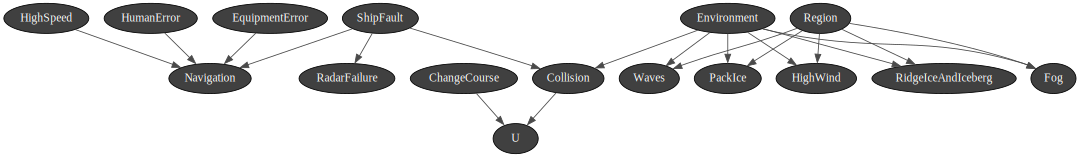

In [193]:
print(dn)
gnb.showBN(dn,size="15")

<b> Note: <b> not sure how "ChangeCourse" works but I think that "ChangeCourse"=0 means that we do not continue and a value of 1 is that we do continue

In [194]:
dn.utility("U")[{"ChangeCourse":0, "Collision":0}] = +100 #Do not change course + no collision -> Nothing changes
dn.utility("U")[{"ChangeCourse":0, "Collision":1}] = -1000 #Do not change course + collision -> Stay on a collision course
dn.utility("U")[{"ChangeCourse":1, "Collision":0}] = -100 #Change course + no collision -> Change course unnecessarily
dn.utility("U")[{"ChangeCourse":1, "Collision":1}] = 10 #Change course + collision -> Go off a collision course 
dn.utility("U")

(pyAgrum.Potential<double>@000001EC3553BD40) 
             ||  U      |
Collis|Change||0        |
------|------||---------|
0     |0     || 50.0000 |
1     |0     || -50.0000|
0     |1     || -25.0000|
1     |1     || 0.0000  |

# Inference

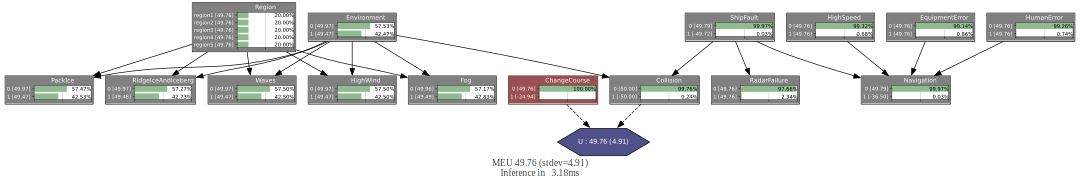

In [195]:
ie = gum.ShaferShenoyLIMIDInference(dn)
ie.makeInference
gnb.showInference(dn, size = 15, engine = ie)


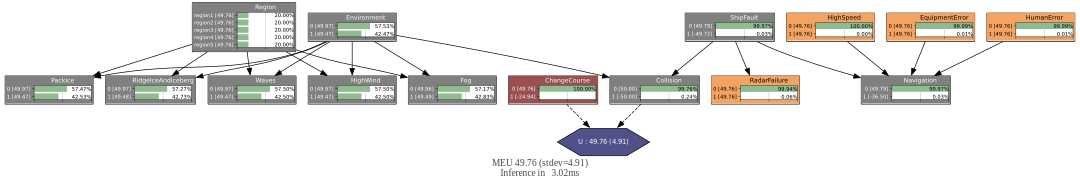

In [196]:
#ie.setEvidence({'s': [Pr(knowing|off), Pr(knowing|on)], 'c': [1, 0]}) , 
ie.setEvidence({"HighSpeed":[1,0.0068], "EquipmentError":[1,0.008563], "HumanError":[1,0.0076], "RadarFailure":[1, 0.0234]})
#I.e. at for RadarFailure: if there is a radar failure then we are only 2.34% certain that it has occured. If there is no failure then we know there isn't
ie.makeInference()
gnb.showInference(dn, evs={"HighSpeed":[1,0.0068], "EquipmentError":[1,0.008563], "HumanError":[1,0.0076], "RadarFailure":[1, 0.0234]}, size=15)

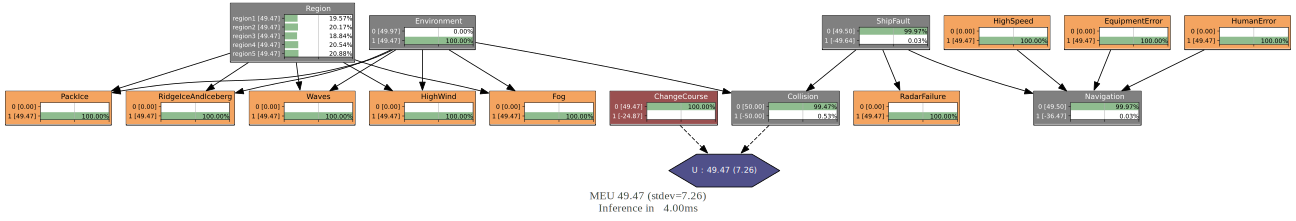

(pyAgrum.Potential<double>@000001EC23319F98) 
  ChangeCourse     |
0        |1        |
---------|---------|
 49.4695 | -24.8674|

In [198]:
#evidence = {"Fog":1, "PackIce":1,"HighSpeed":[1,0.0068], "EquipmentError":[1,0.008563], "HumanError":[1,0.0076], "RadarFailure":[1, 0.0234]}
evidence = {"Fog":1, "PackIce":1, "RidgeIceAndIceberg":1, "Waves":1, "HighWind":1, "HighSpeed":1, "EquipmentError":1, "HumanError":1,"RadarFailure":1}
#evidence = {"Fog":1, "PackIce":1}
ie.setEvidence(evidence)
ie.makeInference()
gnb.showInference(dn, evs = evidence, size=18)
ie.posteriorUtility("ChangeCourse")